In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [62]:
df = pd.read_csv('rainfall in india 1901-2015.csv')

In [63]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
df.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [ ]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [ ]:
df.shape

(4116, 19)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
ANNUAL,26
Oct-Dec,13
NOV,11
Jun-Sep,10
DEC,10
Mar-May,9
JUL,7
OCT,7
MAR,6
Jan-Feb,6


In [ ]:
round(df.isnull().sum() * 100 / len(df),2).rename('%').sort_values(ascending=False)

,%
ANNUAL,0.63
Oct-Dec,0.32
NOV,0.27
Jun-Sep,0.24
DEC,0.24
Mar-May,0.22
JUL,0.17
OCT,0.17
MAR,0.15
Jan-Feb,0.15


In [64]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4090 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4090 non-null   object 
 1   YEAR         4090 non-null   int64  
 2   JAN          4090 non-null   float64
 3   FEB          4090 non-null   float64
 4   MAR          4090 non-null   float64
 5   APR          4090 non-null   float64
 6   MAY          4090 non-null   float64
 7   JUN          4090 non-null   float64
 8   JUL          4090 non-null   float64
 9   AUG          4090 non-null   float64
 10  SEP          4090 non-null   float64
 11  OCT          4090 non-null   float64
 12  NOV          4090 non-null   float64
 13  DEC          4090 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4090 non-null   float64
 16  Mar-May      4090 non-null   float64
 17  Jun-Sep      4090 non-null   float64
 18  Oct-Dec      4090 non-null   float64
dtypes: float64(

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.shape

(4090, 19)

1. Постройте графики количества осадков по годам в разных штатах.

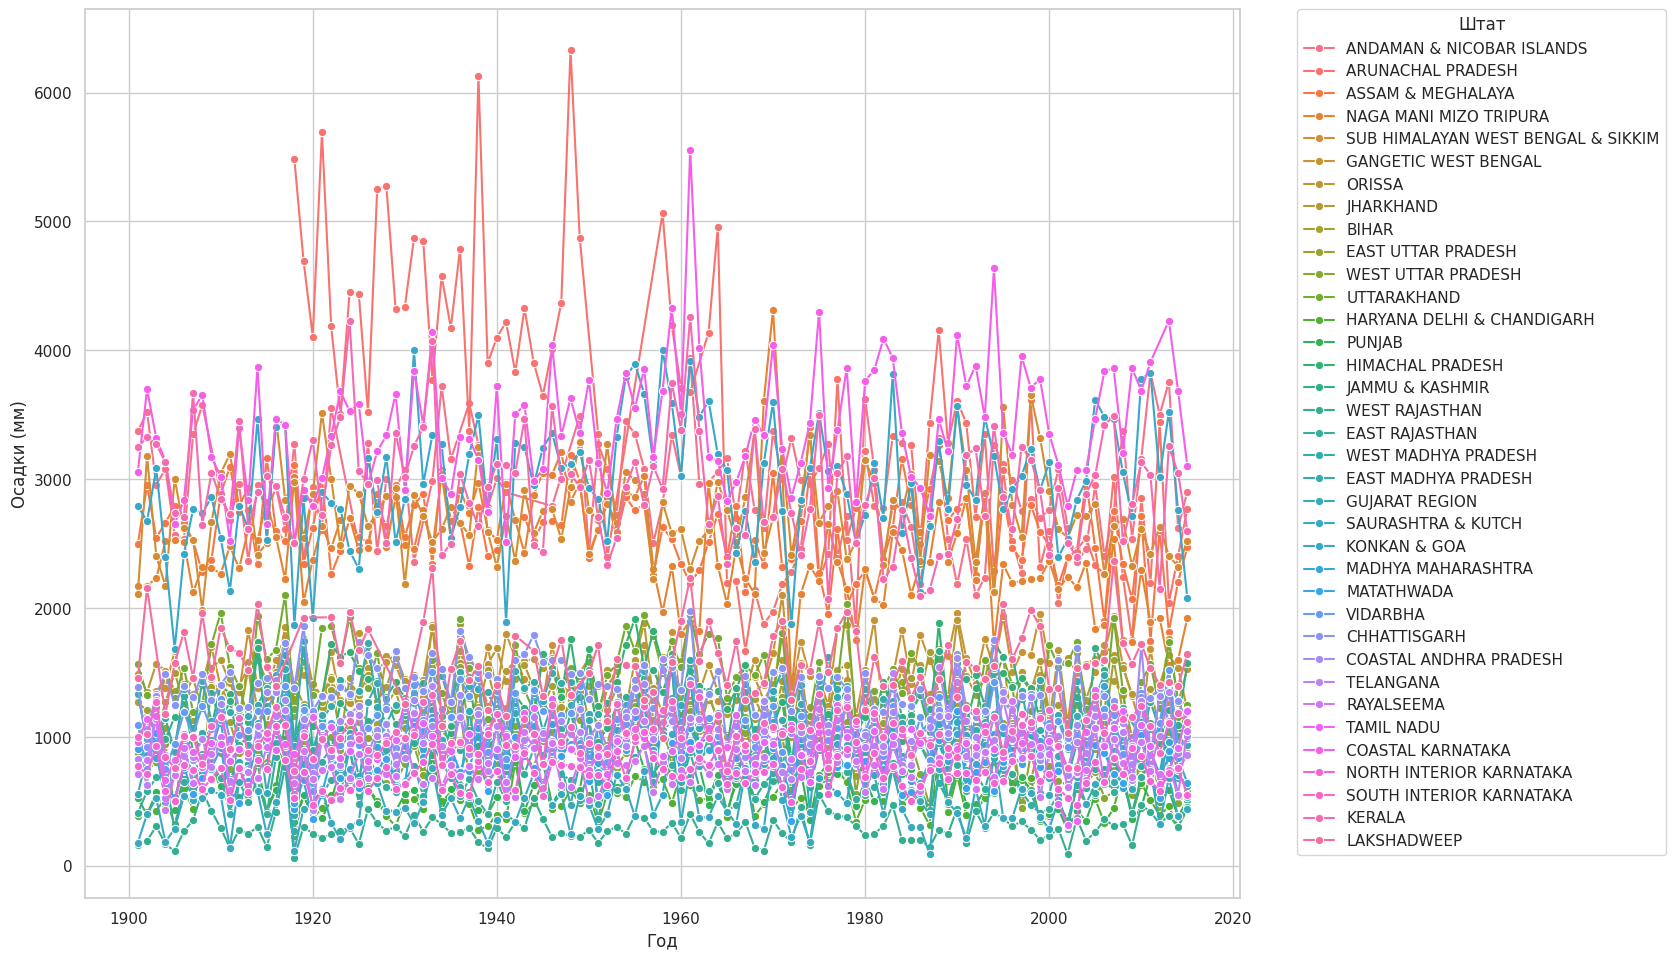

In [68]:
plt.figure(figsize=(17, 10))

# Create a color palette with unique colors for each state
states = df["SUBDIVISION"].unique()
palette = sns.color_palette("husl", n_colors=len(states))

sns.lineplot(
    data=df,
    x="YEAR",
    y="ANNUAL",
    hue="SUBDIVISION",
    palette=palette,
    marker="o",
    linewidth=1.5
)

plt.xlabel("Год")
plt.ylabel("Осадки (мм)")
plt.grid(True)

# Move legend outside the plot
plt.legend(
    title="Штат",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()
plt.show()


2. Постройте графики количества осадков по месяцам по всем годам кумулятивно.

Text(0, 0.5, 'Осадки')

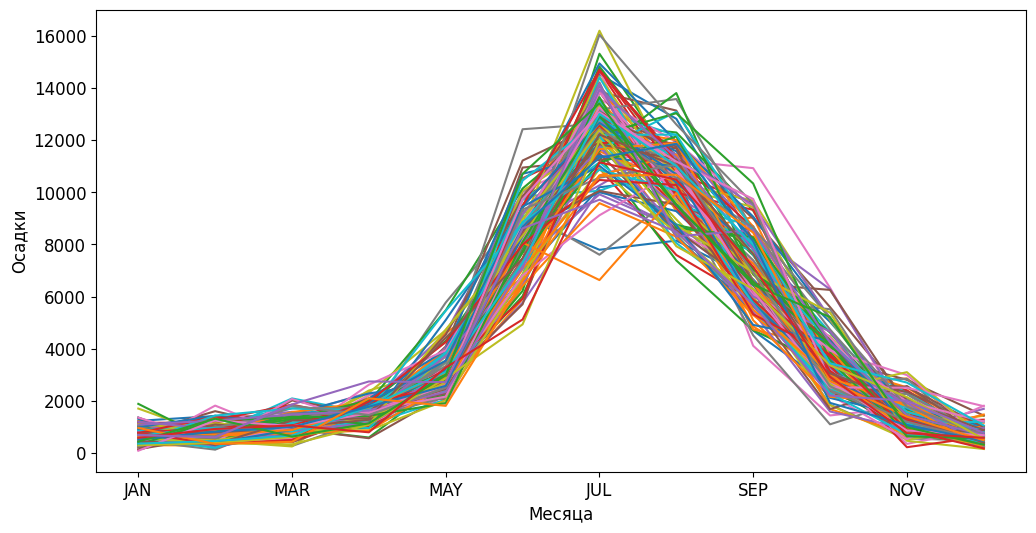

In [10]:
drop_col = ['ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','SUBDIVISION']
df1=df.groupby(by='YEAR').sum().drop(drop_col, axis=1).T.plot(figsize=(12, 6), legend=False, fontsize=12)
df1.set_xlabel('Месяца', fontsize=12)
df1.set_ylabel('Осадки', fontsize=12)

3. Постройте графики количества осадков по штатам, используйте boxplot.

<Axes: xlabel='SUBDIVISION', ylabel='ANNUAL'>

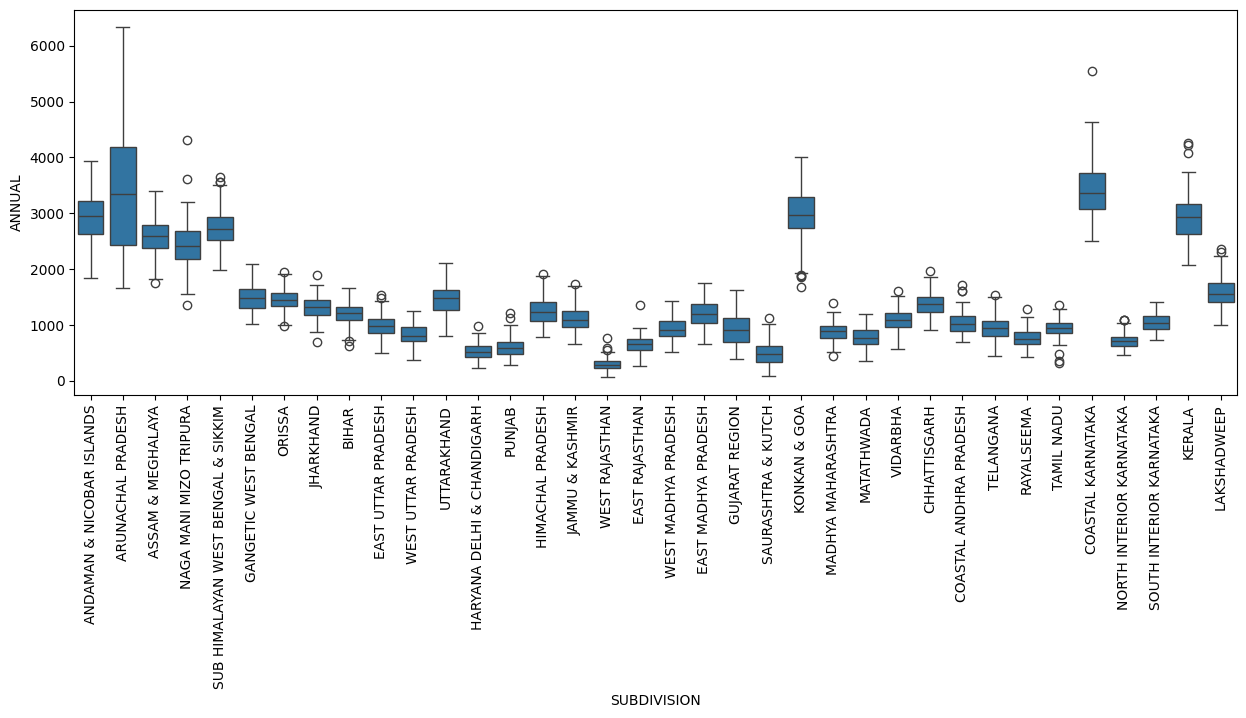

In [14]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation='vertical')
sns.boxplot(x='SUBDIVISION', y='ANNUAL', data=df)

4. Определите штаты, для которых количество осадков минимально и максимально.

In [17]:
overall = df.groupby(by='SUBDIVISION').sum()[['ANNUAL']].sort_values(by='ANNUAL')
low = overall.index.values[0]
high = overall.index.values[-1]
print ('Минимальное кол-во осадков: ', low)
print ('Максимальное кол-во осадков: ', high)

Минимальное кол-во осадков:  WEST RAJASTHAN
Максимальное кол-во осадков:  COASTAL KARNATAKA


5. Выведите уникальные имена штатов и территорий Индии.

In [ ]:
names1 = df['SUBDIVISION'].unique()
districts=pd.read_csv('district wise rainfall normal.csv')
names2 = districts['DISTRICT'].unique()
print(f'Названия штатов: {names1},\nНазвания районов: {names2}')

Названия штатов: ['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP'],
Названия районов: ['NICOBAR' 'SOUTH ANDAMAN' 'N & M ANDAMAN' 'LOHIT' 'EAST SIANG'
 'SUBANSIRI F.D' 'TIRAP' 'ANJAW (LOHIT)' 'LOWER DIBANG' 'CHANGLANG'
 'PAPUM PARE' 'LOW SUBANSIRI' 'UPPER SIANG' 'WEST SIANG' 'DIBANG VALLEY'
 'WEST KAMENG' 'EAST KAMENG' 'TAWANG(W KAME' 'KURUNG KUMEY' 'CACHAR'
 'DARRANG' 'GOA

6. Определите количество лет наблюдений для каждого штата.

In [29]:
 year_count = df.groupby(by='SUBDIVISION')[['YEAR']].count().sort_values(by='YEAR')
 year_count.head()

,YEAR
SUBDIVISION,
ARUNACHAL PRADESH,97
ANDAMAN & NICOBAR ISLANDS,110
LAKSHADWEEP,114
ASSAM & MEGHALAYA,115
CHHATTISGARH,115


7. Определите штат с наименьшим количеством наблюдений

In [30]:
year_count.index[0]

'ARUNACHAL PRADESH'

Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [35]:
df['new']=df['YEAR']+df['ANNUAL']
df[['new','YEAR','ANNUAL']].head()

,new,YEAR,ANNUAL
0,5274.2,1901,3373.2
1,5422.7,1902,3520.7
2,4860.4,1903,2957.4
3,4983.6,1904,3079.6
4,4471.7,1905,2566.7


9. Вычислите корреляцию Пирсона и Спирмена между признаками NOV и MAR. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [75]:
corrPirs = df['NOV'].corr(df['MAR'])
corrSpear = df['NOV'].corr(df['MAR'],method='spearman')
print(f'Корреляция Пирсона: {corrPirs}, корреляция Спирмена: {corrSpear}')

Корреляция Пирсона: 0.008610486970303467, корреляция Спирмена: 0.14187810637877876


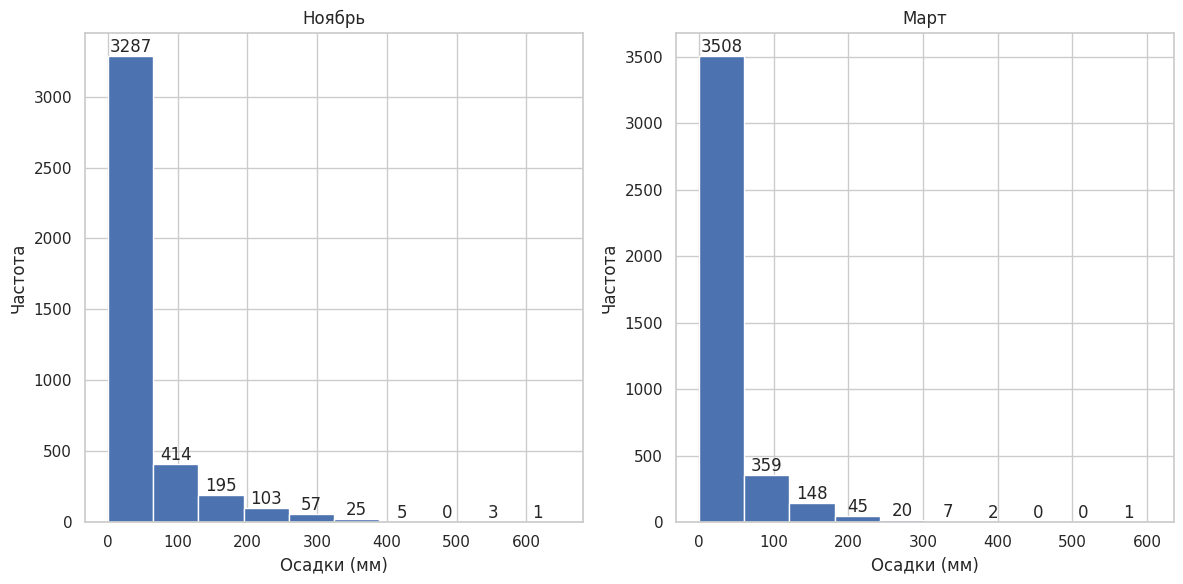

In [74]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
counts_nov, bins_nov = np.histogram(df['NOV'])
bars_nov = plt.bar(bins_nov[:-1], counts_nov, width=np.diff(bins_nov), align='edge')
plt.bar_label(bars_nov)
plt.xlabel('Осадки (мм)')
plt.ylabel('Частота')
plt.title('Ноябрь')

plt.subplot(1, 2, 2)
counts_mar, bins_mar = np.histogram(df['MAR'])
bars_mar = plt.bar(bins_mar[:-1], counts_mar, width=np.diff(bins_mar), align='edge')
plt.bar_label(bars_mar)
plt.xlabel('Осадки (мм)')
plt.ylabel('Частота')
plt.title('Март')

plt.tight_layout()
plt.show()

In [76]:
t, p = ttest_ind(df['MAR'], df['NOV'])
print(f'P-value: {p}')

P-value: 2.757304066409776e-21
